# Graded Challenge 4 - Phase 1
Fathiyah Kalamal Haq - Batch 009

# **Clustering Bank Customer Segmentation**

Customer segmentation for Bank account is required for making a better marketing strategy. Dataset that include the informations about customer behavioural is gathered from kaggle. This is a sample dataset from credit card holders during the last 6 months. The dataset come within 18 variables:

**Balance**:
1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**Purchases**:      

4. PURCHASES : Amount of purchases made from account    
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go     
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment       
7. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)     
8. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)     
9. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)      
10. PURCHASESTRX : Number of purchase transactions made     

**Cash Advance**:       

11. CASHADVANCE : Cash in advance given by the user     
12. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid        
13. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"        
14. CREDITLIMIT : Limit of Credit Card for user     

**Payment**:  
      
15. PAYMENTS : Amount of Payment done by user       
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user      
17. PRCFULLPAYMENT : Percent of full payment paid by user       
18. TENURE : Tenure of credit card service for user     


From this dataset I'm going to make a customer segmentation with clustering algorithm. The clustering method is K-means, DBScan, and Spectral Clustering. In the end, the best model will be used for customer segmentation analysis

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


The Descriptive statistics give insights about how much outliers that this dataset has. But all these outliers are natural outlier because it doesn't refers to wrong input. 

# Data Preprocessing

## Split Data

Before doing preprocessing, splitting dataset to inference and the features should be done. Inference can be an evaluation of the model to make the right predictions.

In [8]:
inf = df.sample(10,random_state=1)
X = df.drop(inf.index, axis=0)

In [9]:
inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.000000,12
7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,0.833333,0.750000,31,12,2500.0,2369.347633,114.089533,0.000000,12
4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,1.000000,0.083333,1,12,18000.0,40627.595240,2149.990102,0.166667,12
5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,5000.0,167.350713,41.839613,0.181818,12
2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,2000.0,2221.896121,227.640560,0.000000,12
331,C10342,92.440743,0.909091,1080.00,1080.00,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,12,6000.0,1077.058667,169.005281,1.000000,12
1169,C11212,348.965773,1.000000,1019.40,444.40,575.00,0.000000,1.000000,0.250000,1.000000,0.000000,0,25,1000.0,214.987376,176.525876,0.250000,12
3448,C13545,3242.285167,1.000000,0.00,0.00,0.00,2732.692813,0.000000,0.000000,0.000000,0.916667,28,0,6000.0,766.465991,1225.221287,0.000000,12
7306,C17503,284.433780,0.363636,212.92,0.00,212.92,0.000000,0.833333,0.000000,0.833333,0.000000,0,15,1500.0,1202.791804,150.107024,0.000000,12
288,C10299,83.148283,0.636364,843.34,843.34,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,17,6500.0,1024.267592,122.850835,0.500000,12


# OUtliers

<AxesSubplot:>

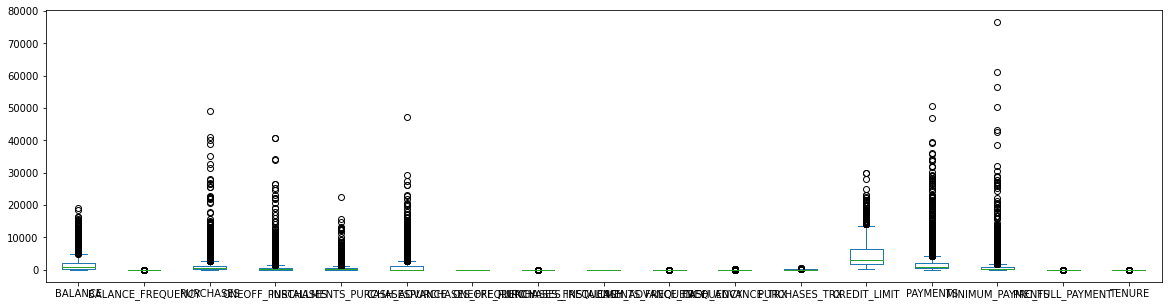

In [10]:
X.plot(kind='box',figsize=(20, 5))

Since the outliers are the natural outliers, I'm not going to handle the outliers from the dataset. Instead, I can normalize the outliers to become the same range in Feature Scalling.

## Handling Missing Value

In [11]:
X.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
X_clean = X.dropna(axis=0)

In [13]:
X_clean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Now, there's no missing value in feature set.

## Feature Scaling

In [14]:
#drop categorical column
X_clean.drop('CUST_ID', axis=1, inplace=True)

In [15]:
scale = StandardScaler()
X_scale = scale.fit_transform(X_clean)
X_scale

array([[-0.74487553, -0.37108174, -0.42907367, ..., -0.30554487,
        -0.53755787,  0.35541247],
       [ 0.76422081,  0.06699991, -0.47307429, ...,  0.08744728,
         0.21258916,  0.35541247],
       [ 0.42659964,  0.50508155, -0.11647094, ..., -0.10005013,
        -0.53755787,  0.35541247],
       ...,
       [-0.75322972, -0.29807054, -0.40647377, ..., -0.32959692,
         0.30635838, -4.21925244],
       [-0.75797486, -0.29807054, -0.47307429, ..., -0.34082967,
         0.30635838, -4.21925244],
       [-0.58649544, -1.10121781,  0.03115714, ..., -0.3271237 ,
        -0.53755787, -4.21925244]])

In [16]:
norm = Normalizer()
X_norm = norm.fit_transform(X_scale)

In [17]:
X_norm

array([[-0.31178597, -0.15532539, -0.17959933, ..., -0.12789332,
        -0.22500806,  0.14876663],
       [ 0.21560713,  0.01890247, -0.13346691, ...,  0.02467122,
         0.05997709,  0.10027136],
       [ 0.12168538,  0.14407194, -0.03322274, ..., -0.02853879,
        -0.15333564,  0.1013796 ],
       ...,
       [-0.15660547, -0.06197243, -0.08451076, ..., -0.06852714,
         0.06369557, -0.87723306],
       [-0.15382777, -0.06049214, -0.09600841, ..., -0.06916993,
         0.06217413, -0.85627929],
       [-0.11530254, -0.2164948 ,  0.00612536, ..., -0.06431115,
        -0.10568162, -0.82948733]])

Now the feature set has been in the same range number.

## VIF

In [18]:
v = pd.DataFrame()
v['feature'] = X_clean.columns

v['vif'] = [variance_inflation_factor(X_clean.values,idx) for idx in range(len(X_clean.columns))]
v.sort_values('vif')

,feature,vif
14,MINIMUM_PAYMENTS,1.410445
15,PRC_FULL_PAYMENT,1.737586
5,CASH_ADVANCE,3.612916
10,CASH_ADVANCE_TRX,3.886634
13,PAYMENTS,3.941947
0,BALANCE,4.163706
11,PURCHASES_TRX,4.242710
12,CREDIT_LIMIT,4.689842
9,CASH_ADVANCE_FREQUENCY,4.957458
7,ONEOFF_PURCHASES_FREQUENCY,5.686998


VIF can detect multicollinierity from the features. Higher VIF means higher multicollinierity. From the calculation of VIF, there are 8 features which have VIF>5 so we can say that all these 8 features can only be represent by 1 feature only. But which one could represent them is what PCA do for dimensionallity reduction. We expect there are about 9+1 features after reduction.

# PCA

In [19]:
pca = PCA()
pca.fit(X_norm)
cumsum = np.cumsum(pca.explained_variance_ratio_)

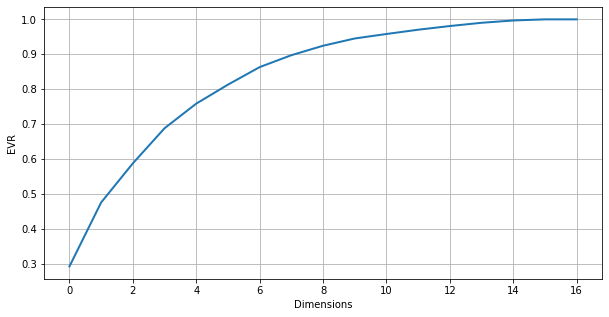

In [20]:
plt.figure(figsize=(10,5))
plt.plot(cumsum, linewidth=2)
plt.xlabel("Dimensions")
plt.ylabel("EVR")
plt.grid(True)
plt.show()

From EVR graphic, 10 dimension can carry 90% information from all features. But for this clustering, 80% information is also fine and that means there are 4-6 features after reduction.

In [21]:
pca = PCA(n_components=0.8)
X_reduced = pca.fit_transform(X_norm)

In [22]:
pca.n_components_

6

After reduction with PCA, the features that is used for modelling are 6 dimensions that carry 80% informations of all features.

# Clustering

## K-means

### Elbow Method

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

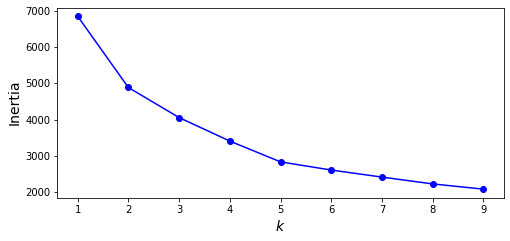

In [24]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

To find the optimal *k*, Elbow method implies that about 3-6 *k* are right to be clustered. From here, we can continue to silhouette method.

### Silhouette method

In [25]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

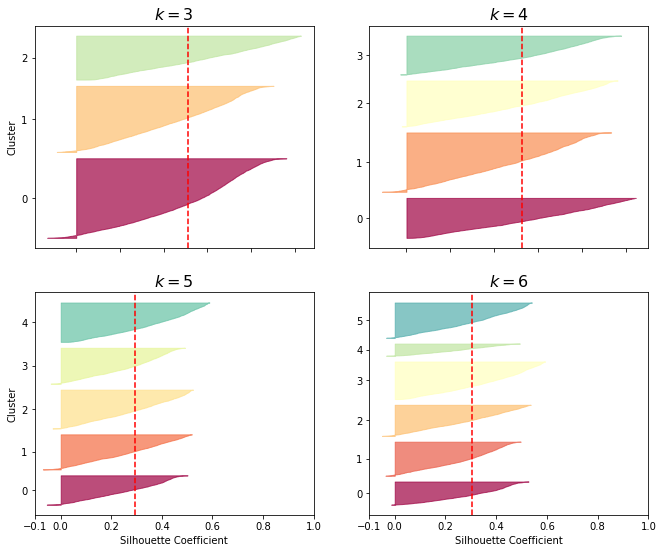

In [26]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

k=3,4,5,6 are good clusters that the density of the cluster are out of the silhoutte score (red dashed line). But, from here I'll choose k=4 because the proportions of each cluster are almost equal. 

# Model Definition

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)

From elbow and silhouette method we get the right n_clusters. y_pred will be merge to the features set to be explored.

## DBScan

The second method of clustering that I use is DBScan. Before modelling, I have to find the right epsilon for DBScan hyperparameter. Nearest Neighbor can provide my need to find the right epsilon, referring to the euclidean distance method.

### Nearest Neighbors

In [28]:
n = NearestNeighbors(n_neighbors=2)
k = n.fit(X_reduced)

In [29]:
d,id = k.kneighbors(X_reduced)

In [30]:
d = np.sort(d[:,1],axis=0)

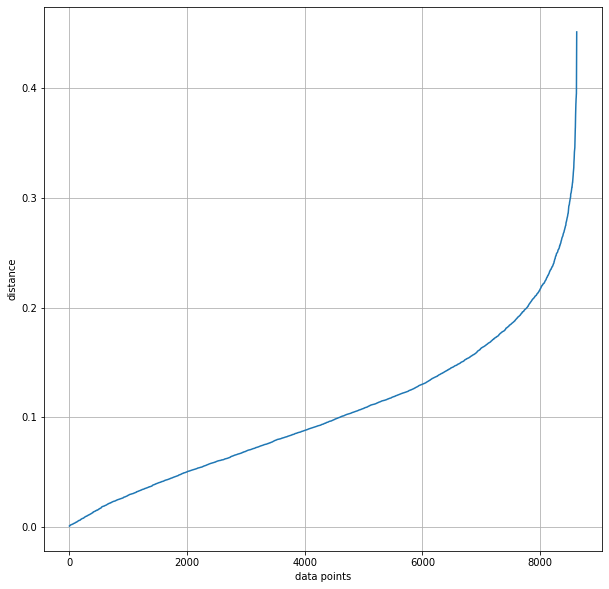

In [31]:
plt.figure(figsize=(10,10))
plt.plot(d)
plt.ylabel('distance')
plt.xlabel('data points')
plt.grid(True)
plt.show()

Above is the graphic that show the distance and how much it can carry the data points. In 0.2 distance, the data points that included are 7000-8000. For 0.3 distance, almost all the data points can be included. This two distances will be the epsilon of DBScan model.

### DBscan 1

In [32]:
dbscan = DBSCAN(eps = 0.2, min_samples=5)
db = dbscan.fit(X_reduced)

In [33]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

There are 18 clusters made for epsilon 0.2, one of it is outlier (-1).

### DBscan 2

In [34]:
dbscan2 = DBSCAN(eps = 0.3, min_samples=5)
db2 = dbscan2.fit(X_reduced)

In [35]:
np.unique(db2.labels_)

array([-1,  0,  1,  2], dtype=int64)

There are 4 clusters made for epsilon 0.3, one of it is outlier (-1)

In [36]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

<function matplotlib.pyplot.show(close=None, block=None)>

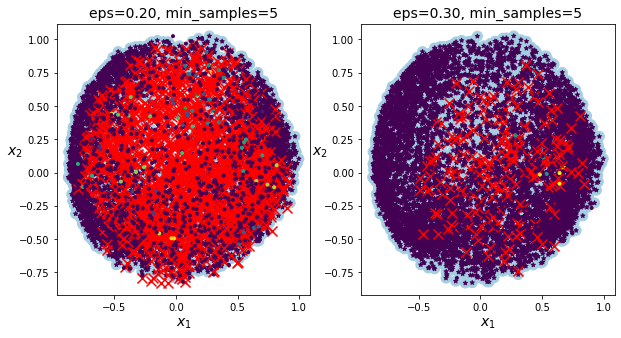

In [37]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_dbscan(dbscan, X_reduced, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X_reduced, size=100)
plt.show

The visualization between the two epsilons implies that eps=0.2 has more outliers than eps=0.3. But from this we can see that the proportions of the cluster are imbalanced. The majority cluster is purple cluster and the other clusters (yellow, green) are hard to be seen since they are minority clusters. So, in my perspective DBScan couldn't handle this clustering as well as K-means.

## Spectral 

Spectral is cluster method that combine the K-means and PCA method. Since K-means has k=4 optimal cluster so we could make that hyperparameter in spectral clustering.

In [38]:
sc = SpectralClustering(n_clusters=4, gamma=50, random_state=42,n_jobs=-1)
sc.fit(X_reduced)

SpectralClustering(gamma=50, n_clusters=4, n_jobs=-1, random_state=42)

In [39]:
np.unique(sc.labels_)

array([0, 1, 2, 3])

In [40]:
sc2 = SpectralClustering(n_clusters=4, gamma=20, random_state=42,n_jobs=-1)
sc2.fit(X_reduced)

SpectralClustering(gamma=20, n_clusters=4, n_jobs=-1, random_state=42)

In [41]:
np.unique(sc2.labels_)

array([0, 1, 2, 3])

In [42]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

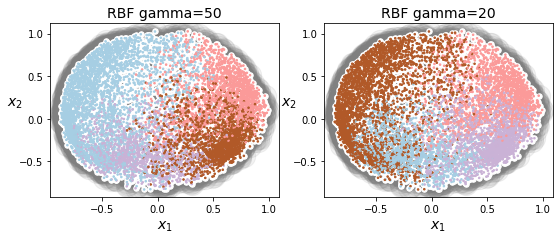

In [43]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc, X_reduced, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2,X_reduced,size=500, alpha=0.1)

plt.show()


For RBF gamma=50 the clustering proportions are imbalance where the blue cluster is a majority cluster. In gamma-20, the orange cluster are the majority cluster. This clustering can also make a good clustering like K-means but the proportion of the cluster are better with K-means.

# PCA Visualization

In [44]:
pca2 = PCA(n_components=2)
pca_data = pca2.fit_transform(X_norm)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = y_pred + 1

In [45]:
fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

This is a visualization for k-means clustering with 4 clusters. The Feature set are centered because of the normalization effect. Each cluster divided into the same proportions.

In [46]:
pca3 = PCA(n_components=3)
pca_data2 = pca3.fit_transform(X_norm)
pca_df2 = pd.DataFrame.from_records(data=pca_data2, columns=["x1","x2","x3"])
pca_df2["Cluster"] = y_pred + 1

In [47]:
fig = px.scatter_3d(pca_df2, x="x1", y="x2", z="x3", color='Cluster', width=800, height=800)
fig.show()

On the 3D visualization, the separation of 4 cluster can be seen clearly.

# Inference

In [48]:
inf2 = inf.drop('CUST_ID',axis=1)
inf_scale = scale.transform(inf2)
inf_norm = norm.transform(inf_scale)
inf_red = pca.transform(inf_norm)
inf_pred = kmeans.predict(inf_red)
inf['cluster'] = inf_pred

In [49]:
inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,0.333333,0.166667,2,16,4000.0,549.682725,254.640736,0.000000,12,3
7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,0.833333,0.750000,31,12,2500.0,2369.347633,114.089533,0.000000,12,0
4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,1.000000,0.083333,1,12,18000.0,40627.595240,2149.990102,0.166667,12,3
5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,0.083333,0.000000,0,3,5000.0,167.350713,41.839613,0.181818,12,1
2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,2000.0,2221.896121,227.640560,0.000000,12,2
331,C10342,92.440743,0.909091,1080.00,1080.00,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,12,6000.0,1077.058667,169.005281,1.000000,12,3
1169,C11212,348.965773,1.000000,1019.40,444.40,575.00,0.000000,1.000000,0.250000,1.000000,0.000000,0,25,1000.0,214.987376,176.525876,0.250000,12,2
3448,C13545,3242.285167,1.000000,0.00,0.00,0.00,2732.692813,0.000000,0.000000,0.000000,0.916667,28,0,6000.0,766.465991,1225.221287,0.000000,12,0
7306,C17503,284.433780,0.363636,212.92,0.00,212.92,0.000000,0.833333,0.000000,0.833333,0.000000,0,15,1500.0,1202.791804,150.107024,0.000000,12,2
288,C10299,83.148283,0.636364,843.34,843.34,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,17,6500.0,1024.267592,122.850835,0.500000,12,3


# EDA 2

In [50]:
y_pred.shape

(8626,)

In [51]:
X.shape

(8940, 18)

In [52]:
X_clean.shape

(8626, 17)

In [53]:
X_clean['cluster'] = y_pred

<AxesSubplot:>

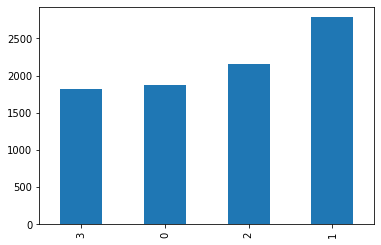

In [54]:
X_clean.cluster.value_counts().sort_values().plot(kind='bar')

Cluster 1 has the most customer than any other cluster, meanwhile cluster 3 has the least customer.

In [55]:
X_clean.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3616.065094,0.959985,352.216419,224.814104,127.456569,3428.622392,0.217470,0.099288,0.133667,0.418209,11.252935,4.993597,6110.470231,2786.191888,1667.965956,0.034094,11.319637
1,809.476374,0.788552,247.120453,195.436074,51.861598,383.233621,0.153422,0.082898,0.067736,0.078915,1.330819,2.589440,3010.052682,855.122690,437.437095,0.087042,11.552083
2,578.201182,0.915621,775.877638,115.795779,661.021227,148.481605,0.858672,0.058898,0.808590,0.031700,0.588563,16.588563,3037.211140,905.277678,636.199726,0.286752,11.470479
3,1948.293103,0.967554,3208.975938,2204.961112,1004.053902,422.902325,0.877794,0.678326,0.551294,0.063193,1.374794,42.624106,6954.446390,3198.290573,961.720909,0.248006,11.801871


### Balance

<AxesSubplot:xlabel='cluster'>

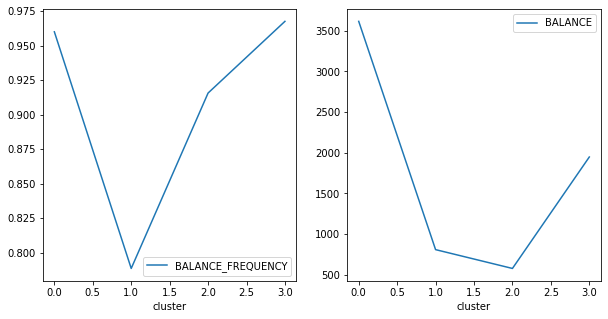

In [56]:
f,ax = plt.subplots(ncols=2,figsize=(10,5))
X_clean[['BALANCE_FREQUENCY','cluster']].groupby('cluster').mean().plot(ax=ax[0])
X_clean[['BALANCE','cluster']].groupby('cluster').mean().plot(ax=ax[1])

- Cluster 0: often update, highest balance
- cluster 1: rarely update, low balance
- cluster 2: often update, lowest balance
- cluster 3: often update, average balance

### Purchases

<AxesSubplot:xlabel='cluster'>

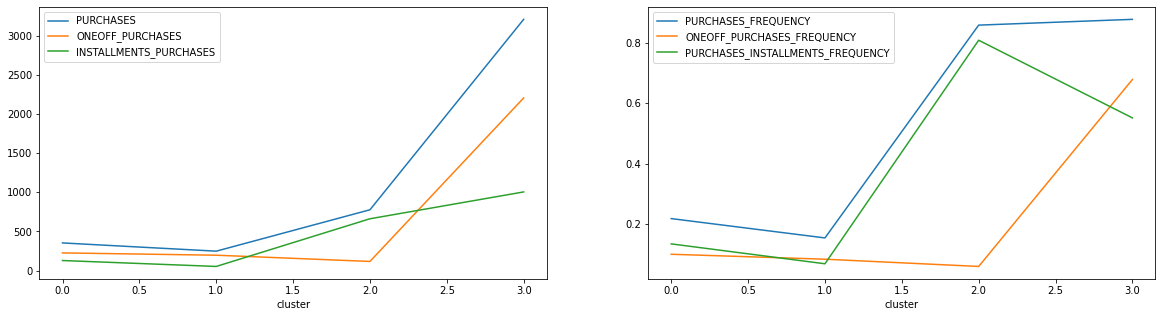

In [57]:
f,ax = plt.subplots(ncols=2,figsize=(20,5))
X_clean[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','cluster']].groupby('cluster').mean().plot(ax=ax[0])
X_clean[['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','cluster']].groupby('cluster').mean().plot(ax=ax[1])

<AxesSubplot:xlabel='cluster'>

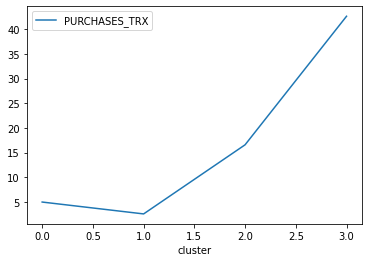

In [58]:
X_clean[['PURCHASES_TRX','cluster']].groupby('cluster').mean().plot()

- Cluster 0: rarely make purchases
- cluster 1: rarely make purchases
- cluster 2: often make purchases but not spending too much money
- Cluster 3: often make purchases with high amount

### Cash Advance

<AxesSubplot:xlabel='cluster'>

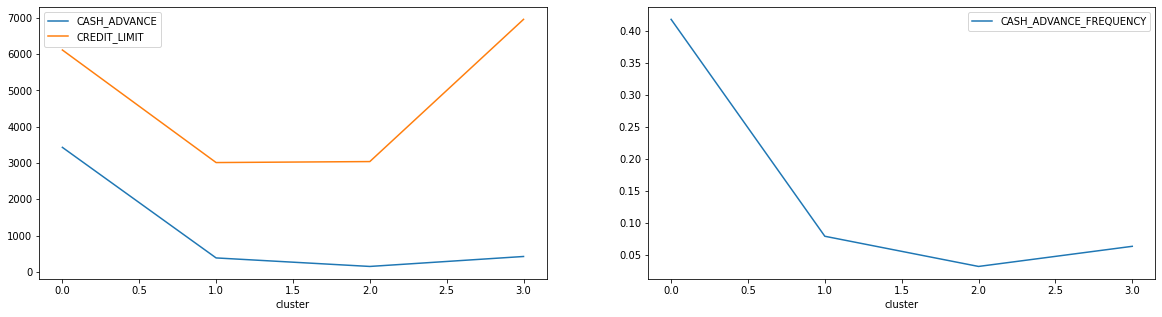

In [59]:
f,ax = plt.subplots(ncols=2,figsize=(20,5))
X_clean[['CASH_ADVANCE','CREDIT_LIMIT','cluster']].groupby('cluster').mean().plot(ax=ax[0])
X_clean[['CASH_ADVANCE_FREQUENCY','cluster']].groupby('cluster').mean().plot(ax=ax[1])

<AxesSubplot:xlabel='cluster'>

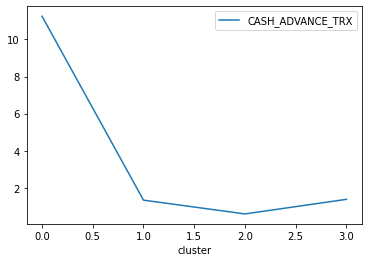

In [60]:
X_clean[['CASH_ADVANCE_TRX','cluster']].groupby('cluster').mean().plot()

- cluster 0: often use cash advance with high amount
- cluster 1: rarely use cash advance but when use it has a big amount
- cluster 2: very rarely use cash advence and has lowest amount
- cluster 3: rarely use cash advance but when use it, it has a highest amount

### Payment

<AxesSubplot:xlabel='cluster'>

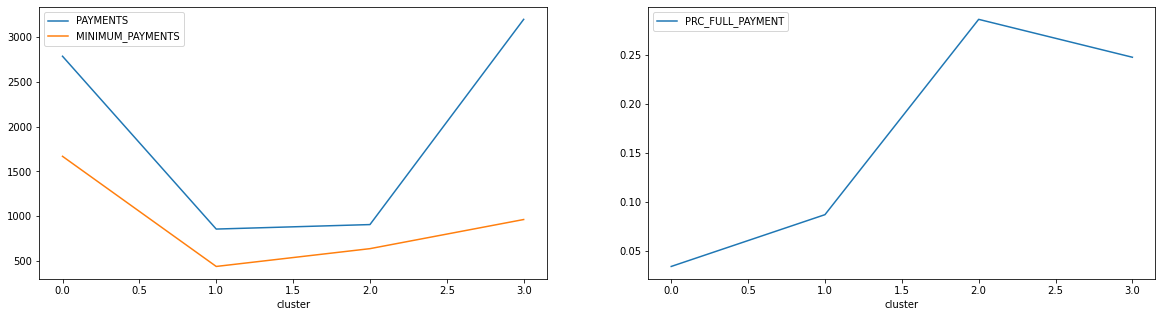

In [61]:
f,ax = plt.subplots(ncols=2,figsize=(20,5))
X_clean[['PAYMENTS','MINIMUM_PAYMENTS','cluster']].groupby('cluster').mean().plot(ax=ax[0])
X_clean[['PRC_FULL_PAYMENT','cluster']].groupby('cluster').mean().plot(ax=ax[1])

- cluster 0: Has high payment but rarely paid fully
- cluster 1: lowest minimum payment and rarely paid fully
- cluster 2: low payment and often paid fully
- cluster 3: Highest Payment and often paid fully

From All the characteristic, we know that
1. cluster 0: Customers who likes saving a lot of money, rarely paid fully but when they do the amount is enormous.
2. cluster 1: Customers who likes using Cash Advance product.
3. cluster 2: Customers who often make purchases in moderate amount and also often paid fully.
4. cluster 3: Customers who likes making purchases, use cash advance, and often paid fully with high amount. 

# Conclusion

features are divided into 4 main factors, namely balances, cash advances, purchases, payments which are explained into 18 features.

In performing clustering, preprocessing data is carried out by 
1. handling missing values by trimming NaN values
2. feature scaling with StandardScaler and normalization
3. feature extraction with PCA. This feature extraction reduces the feature to 6 features.

After that, clustering is done with K-means, DBScan, and Spectral clustering. The best model with *k*- optimal is obtained form K-means algorithm where k=4.

The clustering result are divided into:
1. cluster 0: Customers who likes saving a lot of money, rarely paid fully but when they do the amount is enormous.
2. cluster 1: Customers who likes using Cash Advance product.
3. cluster 2: Customers who often make purchases in moderate amount and also often paid fully.
4. cluster 3: Customers who likes making purchases, use cash advance, and often paid fully with high amount. 

My recommendation for the bank is that 
- cluster 3 is a loyal customer and deserves appreciation, in the hope of increasing loyalty and trust for the bank.
- cluster 0 can be given information about full payment in order to increase the frequency of payments
- cluster 1 is given a discount or package that can increase purchases on a credit card, this customer is also a loyal customer in terms of full payment
- cluster 2 are customers who also loyal at paid fully for the payment.